In [179]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

#remove duplicates 
city_data = city_data.drop_duplicates('city')

# Combine the data into a single dataset xaxis / yaxis 
pyber_df = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [180]:
# Obtain the x and y coordinates for each of the three city types
#avg fare for each city 
avg_fare = pyber_df.groupby("city")["fare"].mean()

#coutn total rides for each city 
total_rides = pyber_df.groupby("city")["ride_id"].count()

#average drives per city 
avg_drivers = pyber_df.groupby("city")["driver_count"].mean()

 #find city/city types from city_data file
city_type = city_data.set_index("city")['type']
#city_type.value_counts()
#Urban       66
#Suburban    36
#Rural       18

#crate dF for city name, avg fare, avg rides, #of drivers and city type
all_cities = pd.DataFrame({"Average Fare per City": avg_fare,
                          "Number of Rides": total_rides,
                          "Total Drivers per City": avg_drivers,
                          "City Type": city_type
})

all_cities.style.format({"Average Fare per City":"${:,.2f}"})



,Average Fare per City,Number of Rides,Total Drivers per City,City Type
Amandaburgh,$24.64,18,12,Urban
Barajasview,$25.33,22,26,Urban
Barronchester,$36.42,16,11,Suburban
Bethanyland,$32.96,18,22,Suburban
Bradshawfurt,$40.06,10,7,Rural
Brandonfort,$35.44,19,10,Suburban
Carriemouth,$28.31,27,52,Urban
Christopherfurt,$24.50,27,41,Urban
Colemanland,$30.89,22,23,Suburban
Davidfurt,$32.00,17,23,Suburban


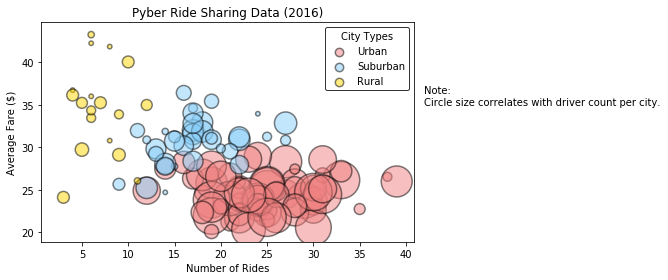

In [181]:
# Build the scatter plots for each city types
#Urban scatter plot for size (s) *20


urban_df = all_cities.loc[all_cities["City Type"]=="Urban"]
plt.scatter(urban_df["Number of Rides"], urban_df["Average Fare per City"], color="lightcoral",edgecolors="black", s=urban_df["Total Drivers per City"]*20, label ="Urban", alpha=0.5, linewidth=1.5)

#suburban 
suburb_df = all_cities.loc[all_cities["City Type"]=="Suburban"]
plt.scatter(suburb_df["Number of Rides"], suburb_df["Average Fare per City"], color="lightskyblue", edgecolors="black", s=suburb_df["Total Drivers per City"]*20, label ="Suburban", alpha=0.5, linewidth=1.5)

#rural
ruru_df = all_cities.loc[all_cities["City Type"]=="Rural"]
plt.scatter(ruru_df["Number of Rides"], ruru_df["Average Fare per City"], color="gold", edgecolors="black", s=ruru_df["Total Drivers per City"]*20, label ="Rural", alpha=0.5, linewidth=1.5)


#Add Title, xaxis and yaxis 
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare ($)")
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.")

# Incorporate the other graph properties

# Create a legend

py_legend = plt.legend(title="City Types", edgecolor="black")
py_legend.legendHandles[0]._sizes=[70]
py_legend.legendHandles[1]._sizes=[70]
py_legend.legendHandles[2]._sizes=[70]


# Save Figure
plt.tight_layout()
plt.savefig("png/ScatterPlot_PyRiders.png")
# Show plot
plt.show()

## Total Fares by City Type

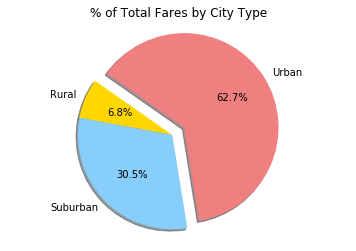

In [182]:
# Calculate Type Percents
cf_pie= pyber_df.groupby(["type"])["fare"].sum()

# Build Pie Chart
explode = (0, 0, 0.15)
colors= ["gold", "lightskyblue", "lightcoral"]

plt.pie(cf_pie, explode=explode, labels=cf_pie.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle= 145)
plt.title("% of Total Fares by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("png/Pyber_City__Fare_Pie.png")

# Show Figure
plt.show()

## Total Rides by City Type

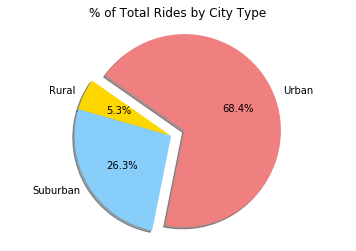

In [183]:
# Calculate Ride Percents
cr_pie = pyber_df.groupby(["type"])["ride_id"].count()

# Build Pie Chart
explode =(0,0,0.15)
colors = ["gold","lightskyblue","lightcoral"]

plt.pie(cr_pie, labels=cf_pie.index,explode=explode ,autopct="%1.1f%%", colors=colors, shadow=True, startangle=145)
plt.title("% of Total Rides by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("png/Pyber_Rides_City_Type")

# Show Figure
plt.show()

## Total Drivers by City Type

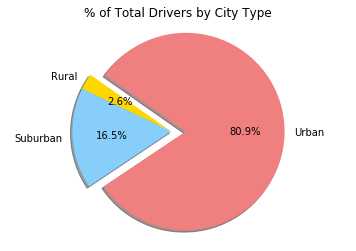

In [184]:
# Calculate Driver Percents
cd_pie = city_data.groupby(["type"])["driver_count"].sum()

# Build Pie Charts
explode= (0,0,0.15)
colors = ["gold", "lightskyblue", "lightcoral"]

plt.pie(cd_pie, labels = cd_pie.index, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=145)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("png/Pyber_Total%_Drivers_City")

# Show Figure
plt.show()